#                 TELECOM CHURN - LOGISTIC REGRESSION CASE STUDY

##  IMPORTING THE REQUIRED PACKAGES 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##  READ THE FILES

In [2]:
churn = pd.read_csv("churn_data.csv")
customer = pd.read_csv("customer_data.csv")
internet = pd.read_csv("internet_data.csv")

In [3]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [5]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


## MERGE THE FILES TO CREATE A SINGLE FILE

In [6]:
df1 = pd.merge(churn, customer, how='inner', on='customerID')

In [7]:
telecom = pd.merge(df1, internet, how='inner', on='customerID')

In [8]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
telecom.shape

(7043, 21)

## CHECKING FOR MISSING VALUES

In [12]:
telecom.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

## CHECKING FOR IMBALANCED DATA

### Number of Churn

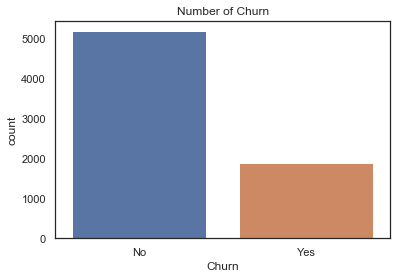

In [13]:
sns.set(style ='white',palette='deep',color_codes=True)
sns.countplot(telecom['Churn'])
plt.title('Number of Churn')
plt.show()

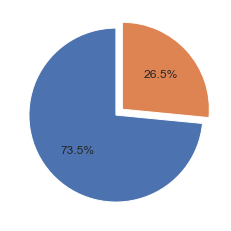

In [14]:
plt.pie(telecom['Churn'].value_counts(),autopct='%1.1f%%',explode=(0,0.1),startangle=90)
plt.show()

## DATA CLEANING 

### TOTAL CHARGES - REPLACE SPACE WITH NaN AND DROP THESE VALUES & CONVERT TYPE INTO FLOAT 

In [15]:
telecom.query("TotalCharges == ' '").TotalCharges.count()

11

In [16]:
telecom["TotalCharges"] = telecom["TotalCharges"].replace(" ",np.nan)
telecom.dropna(inplace = True)

In [17]:
telecom["TotalCharges"] = telecom["TotalCharges"].astype("float")

In [18]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
dtypes: float64(2), int64(2), ob

### REPLACING NO INTERNET SERVICES WITH NO

In [19]:
temp_columns = [col for col in telecom.columns if col not in 
                ("customerID","gender","MonthlyCharges","TotalCharges","Churn")]

In [20]:
temp_columns

['tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [21]:
for col in temp_columns:
    print("{} : {}".format(col,telecom[col].unique()))

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']


In [22]:
for col in temp_columns:
    if col in ("OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"):
        telecom[col] = telecom[col].replace({'No internet service':'No'})

### TENURE - GROUPING BASED ON YEARS

In [23]:
temp_tenure = np.array(telecom["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 1
max: 72


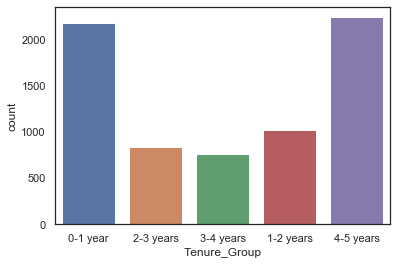

In [24]:
def tenure_group(telecom):
    if telecom["tenure"] <=12:
        return "0-1 year"
    elif (telecom["tenure"] > 12) & (telecom["tenure"] <= 24 ):
        return "1-2 years"
    elif (telecom["tenure"] > 24) & (telecom["tenure"] <= 36) :
        return "2-3 years"
    elif (telecom["tenure"] > 36) & (telecom["tenure"] <= 48) :
        return "3-4 years"
    elif telecom["tenure"] > 48 & (telecom["tenure"] <= 60):
        return "4-5 years"
    elif telecom["tenure"] > 60 & (telecom["tenure"] <= 72):
        return "5-6 years"
telecom["Tenure_Group"] = telecom.apply(lambda telecom:tenure_group(telecom),axis = 1)
sns.countplot(telecom["Tenure_Group"])

## DATA VISUALIZATION

### BIVARIATE ANALYSIS

#### TENURE VS CHURN

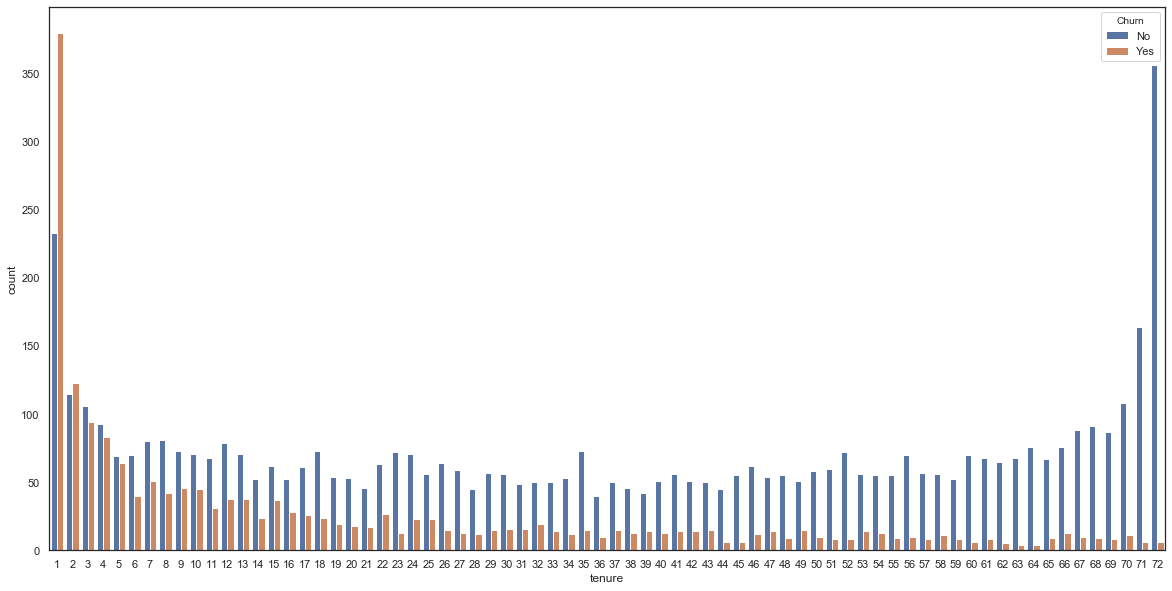

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(telecom["tenure"],hue = telecom["Churn"])

plt.show()

#### CHURN VS ( gender , SeniorCitizen , Partner , Dependents )

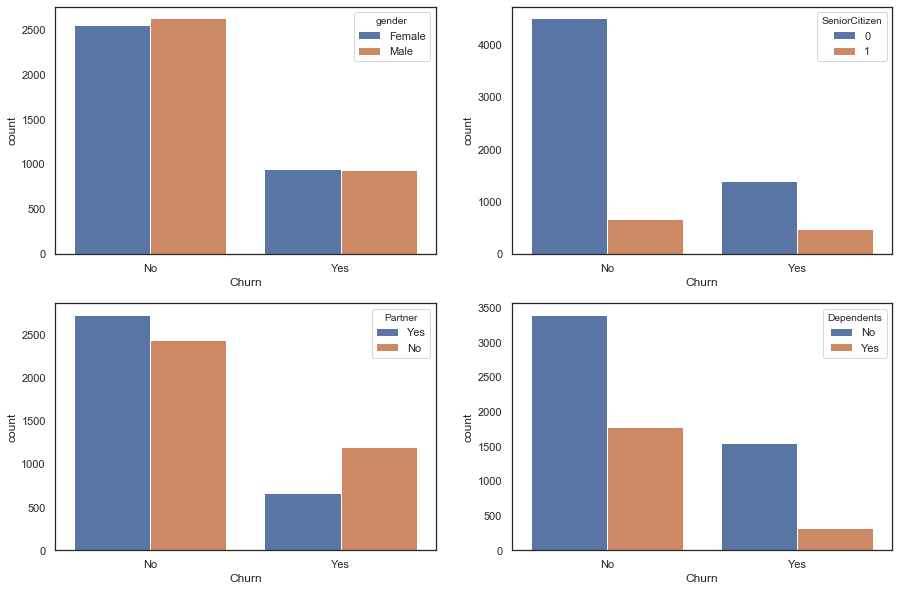

In [26]:
f, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sns.countplot(telecom["Churn"],hue = telecom["gender"],ax=axes[0,0])
sns.countplot(telecom["Churn"],hue = telecom["SeniorCitizen"],ax=axes[0,1])
sns.countplot(telecom["Churn"],hue = telecom["Partner"],ax=axes[1,0])
sns.countplot(telecom["Churn"],hue = telecom["Dependents"],ax=axes[1,1])

plt.show()

#### CHURN VS ( MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV ,         StreamingMovies )

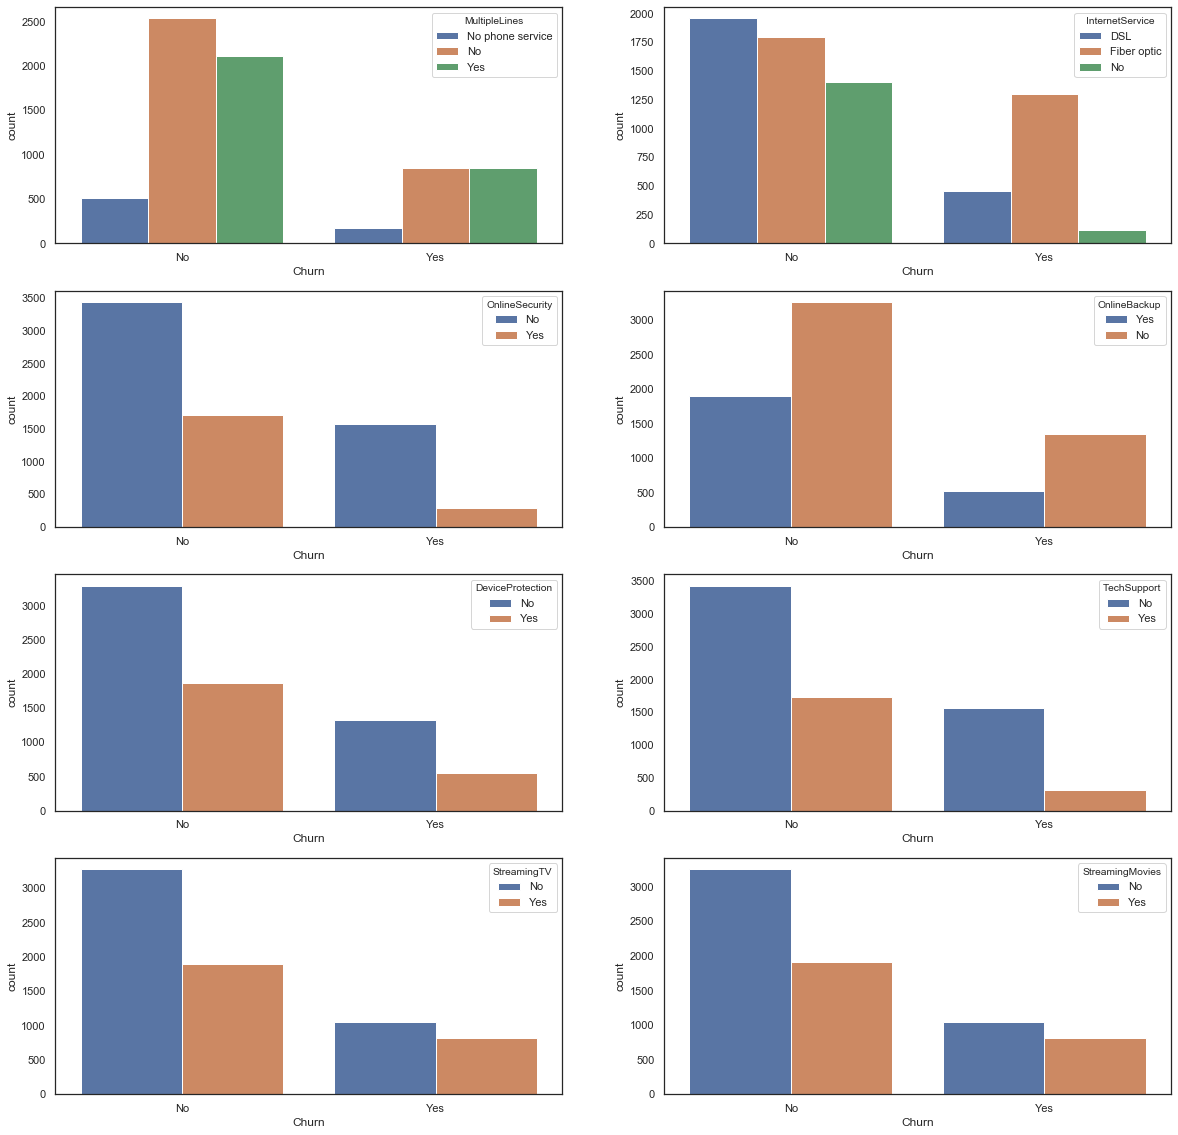

In [27]:
f, axes = plt.subplots(nrows=4, ncols=2,figsize=(20,20))

sns.countplot(telecom["Churn"],hue = telecom["MultipleLines"],ax=axes[0,0])
sns.countplot(telecom["Churn"],hue = telecom["InternetService"],ax=axes[0,1])
sns.countplot(telecom["Churn"],hue = telecom["OnlineSecurity"],ax=axes[1,0])
sns.countplot(telecom["Churn"],hue = telecom["OnlineBackup"],ax=axes[1,1])
sns.countplot(telecom["Churn"],hue = telecom["DeviceProtection"],ax=axes[2,0])
sns.countplot(telecom["Churn"],hue = telecom["TechSupport"],ax=axes[2,1])
sns.countplot(telecom["Churn"],hue = telecom["StreamingTV"],ax=axes[3,0])
sns.countplot(telecom["Churn"],hue = telecom["StreamingMovies"],ax=axes[3,1])

plt.show()

#### CHURN VS ( PhoneService , Contract , PaperlessBilling , PaymentMethod )

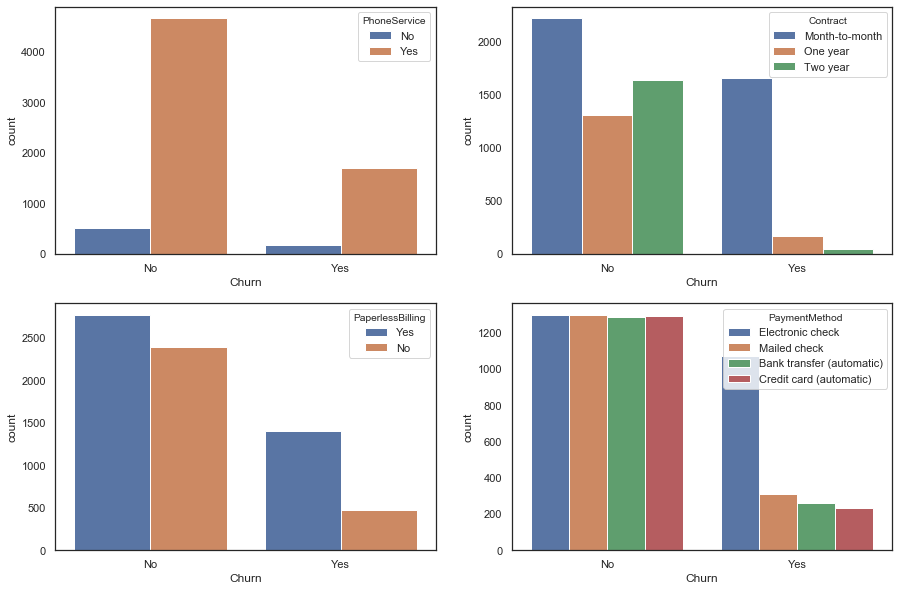

In [28]:
f, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))

sns.countplot(telecom["Churn"],hue = telecom["PhoneService"],ax=axes[0,0])
sns.countplot(telecom["Churn"],hue = telecom["Contract"],ax=axes[0,1])
sns.countplot(telecom["Churn"],hue = telecom["PaperlessBilling"],ax=axes[1,0])
sns.countplot(telecom["Churn"],hue = telecom["PaymentMethod"],ax=axes[1,1])

plt.show()

#### CHURN VS TENURE_GROUP

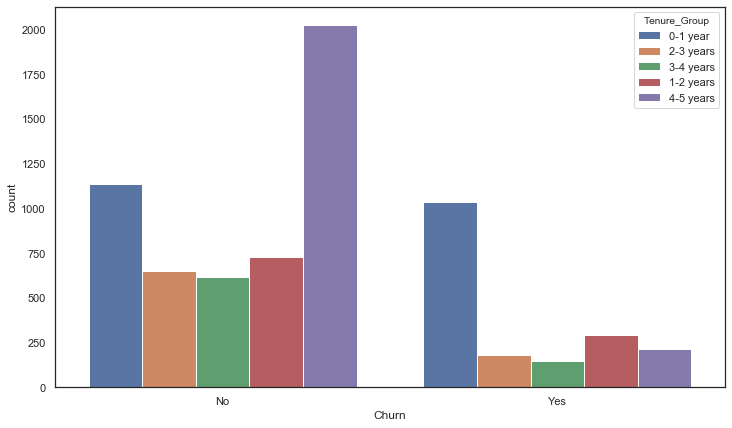

In [29]:
plt.figure(figsize=(12,7))
sns.countplot(telecom["Churn"],hue = telecom["Tenure_Group"])

plt.show()

#### CHURN VS ( tenure , MonthlyCharges , TotalCharges )

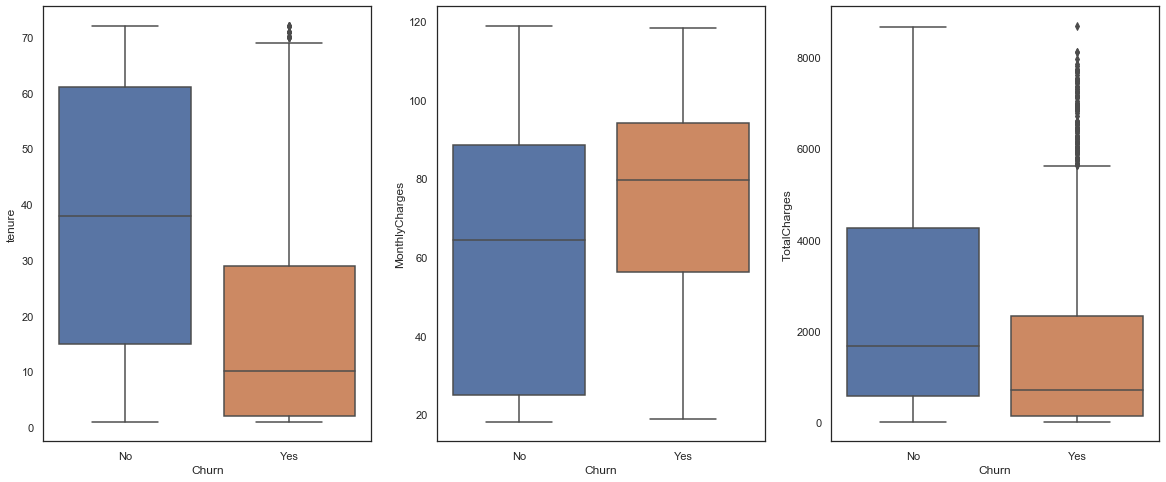

In [30]:
f, axes = plt.subplots( ncols=3, figsize=(20, 8))

sns.boxplot(x="Churn", y="tenure", data=telecom,ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=telecom,ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=telecom,ax = axes[2])

plt.show()

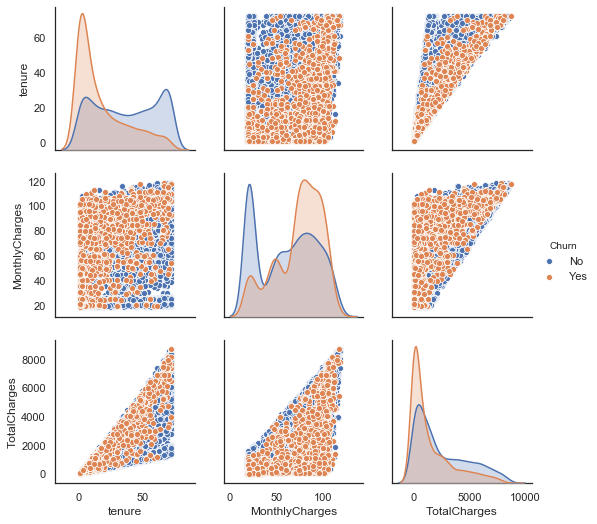

In [31]:
temp_cols = telecom.drop("SeniorCitizen",axis = 1)

sns.pairplot(temp_cols,hue='Churn')

plt.show()

#### TENURE_GROUP VS ( MonthlyCharges , TotalCharges )

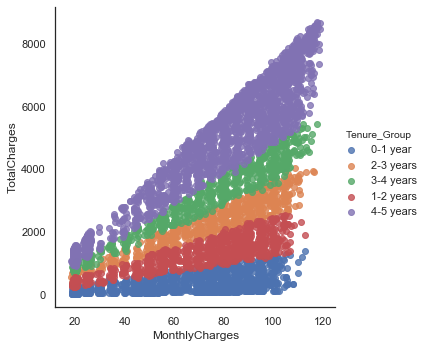

In [32]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=telecom ,fit_reg=False,hue = "Tenure_Group")
plt.show()

#### CHURN VS ( Tenure_Group, MonthlyCharges & TotalCharges )

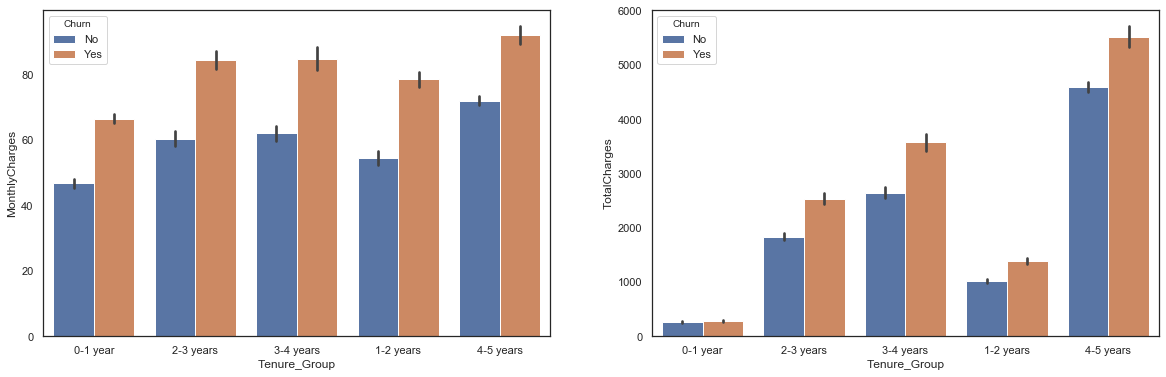

In [33]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))

sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=telecom,hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=telecom,hue = "Churn",ax = axes[1])

plt.show()

## DATA PREPROCESSING

In [34]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Tenure_Group        7032 non-nul

### DUMMY VARIABLE CREATION

In [35]:
cat_cols = [x for x in telecom.columns if telecom[x].nunique()<6 and x!="Churn"]
num_cols = [x for x in telecom.columns if telecom[x].nunique()>6 and x!="customerID"]

id_customer = telecom["customerID"]

label = telecom["Churn"]
label = label.apply(lambda x: 1 if x == "Yes" else 0)

In [36]:
telecom1 = pd.get_dummies(data = telecom,columns = cat_cols)

In [37]:
telecom1.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Tenure_Group_0-1 year,Tenure_Group_1-2 years,Tenure_Group_2-3 years,Tenure_Group_3-4 years,Tenure_Group_4-5 years
0,7590-VHVEG,1,29.85,29.85,No,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
1,5575-GNVDE,34,56.95,1889.50,No,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
2,3668-QPYBK,2,53.85,108.15,Yes,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,0
3,7795-CFOCW,45,42.30,1840.75,No,1,0,0,1,0,...,1,1,0,1,0,0,0,0,1,0
4,9237-HQITU,2,70.70,151.65,Yes,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,0


In [38]:
telecom1['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

### CHECKING FOR OUTLIERS

In [39]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [40]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
95%,72.000000,107.422500,1.000000,6923.590000
99%,72.000000,114.734500,1.000000,8039.883000


## FEATURE STANDARDISATION

In [41]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [42]:
normalized_df=(df-df.mean())/df.std()
telecom1 = telecom1.drop(['tenure','MonthlyCharges','TotalCharges'], 1)
telecom1 = pd.concat([telecom1,normalized_df],axis=1)
telecom1

,customerID,Churn,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),...,StreamingMovies_No,StreamingMovies_Yes,Tenure_Group_0-1 year,Tenure_Group_1-2 years,Tenure_Group_2-3 years,Tenure_Group_3-4 years,Tenure_Group_4-5 years,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,-1.280157,-1.161611,-0.994123
1,5575-GNVDE,No,0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0.064298,-0.260859,-0.173727
2,3668-QPYBK,Yes,0,1,1,0,0,0,1,0,...,1,0,1,0,0,0,0,-1.239416,-0.363897,-0.959581
3,7795-CFOCW,No,1,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0.512450,-0.747797,-0.195234
4,9237-HQITU,Yes,0,1,1,0,0,0,1,0,...,1,0,1,0,0,0,0,-1.239416,0.196164,-0.940391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,-0.343113,0.664821,-0.129171
7039,2234-XADUH,No,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,No,1,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,Yes,0,1,1,0,0,0,1,0,...,1,0,1,0,0,0,0,-1.157934,0.319145,-0.872033


### CHECKING THE CHURN RATE

In [43]:
telecom1['Churn'] = telecom1['Churn'].map({'Yes': 1, 'No': 0})

In [44]:
churn = (sum(telecom1['Churn'])/len(telecom1['Churn'].index))*100

In [45]:
churn

26.578498293515356

## MODEL BUILDING 

### Splitting Data into Training and Test Sets

In [46]:
from sklearn.model_selection import train_test_split

In [50]:
X = telecom1.drop(['Churn','customerID'],axis=1)
y = telecom1['Churn']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Running Your First Training Model

In [54]:
import statsmodels.api as sm

In [55]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4894
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.6
Date:                Thu, 19 Dec 2019   Deviance:                       3973.2
Time:                        00:56:08   Pearson chi2:                 5.48e+03
No. Iterations:                    38                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.3103      0.035     -8.919      0.000      -0.378      -0.242
PhoneService_No                            -0.4759      0.267     -1.781      0.075      -1.000       0.048
PhoneService_Yes                            0.1657      0.235      0.706      0.480      -0.295       0.626
Contract_Month-to-month                     0.5432      0.094      5.766      0.000       0.359       0.728
Contract_One year                          -0.1547      0.094     -1.644      0.100      -0.339       0.030
Contract_Two year                          -0.6988      0.140     -5.007      0.000      -0.972      -0.425
PaperlessBilling_No                        -0.3232      0.049     -6.622      0.000      -0.419      -0.228
PaperlessBilling_Yes                        0.0130      0.048      0.268      0.789      -0.082       0.108
PaymentMethod_Bank transfer (automatic)     0.0193      0.081      0.238      0.812      -0.140       0.178
PaymentMethod_Credit card (automatic)      -0.2342      0.085     -2.762      0.006      -0.400      -0.068
PaymentMethod_Electronic check              0.1663      0.064      2.618      0.009       0.042       0.291
PaymentMethod_Mailed check                 -0.2616      0.085     -3.064      0.002      -0.429      -0.094
gender_Female                              -0.1390      0.043     -3.228      0.001      -0.223      -0.055
gender_Male                                -0.1712      0.043     -3.975      0.000      -0.256      -0.087
SeniorCitizen_0                            -0.3569      0.052     -6.862      0.000      -0.459      -0.255
SeniorCitizen_1                             0.0467      0.056      0.836      0.403      -0.063       0.156
Partner_No                                 -0.1842      0.050     -3.658      0.000      -0.283      -0.086
Partner_Yes                                -0.1261      0.050     -2.515      0.012      -0.224      -0.028
Dependents_No                              -0.0882      0.056     -1.587      0.112      -0.197       0.021
Dependents_Yes                             -0.2221      0.058     -3.849      0.000      -0.335      -0.109
MultipleLines_No                           -0.2127      0.054     -3.946      0.000      -0.318      -0.107
MultipleLines_No phone service             -0.4759      0.267     -1.781      0.075      -1.000       0.048
MultipleLines_Yes                           0.3784      0.219      1.731      0.083      -0.050       0.807
InternetService_DSL                        -0.0453      0.077     -0.585      0.559      -0.197       0.107
InternetService_Fiber optic                 2.4487      0.959      2.553      0.011       0.569       4.329
InternetService_No                         -2.7137      0.9

### CORRELATION MATRIX

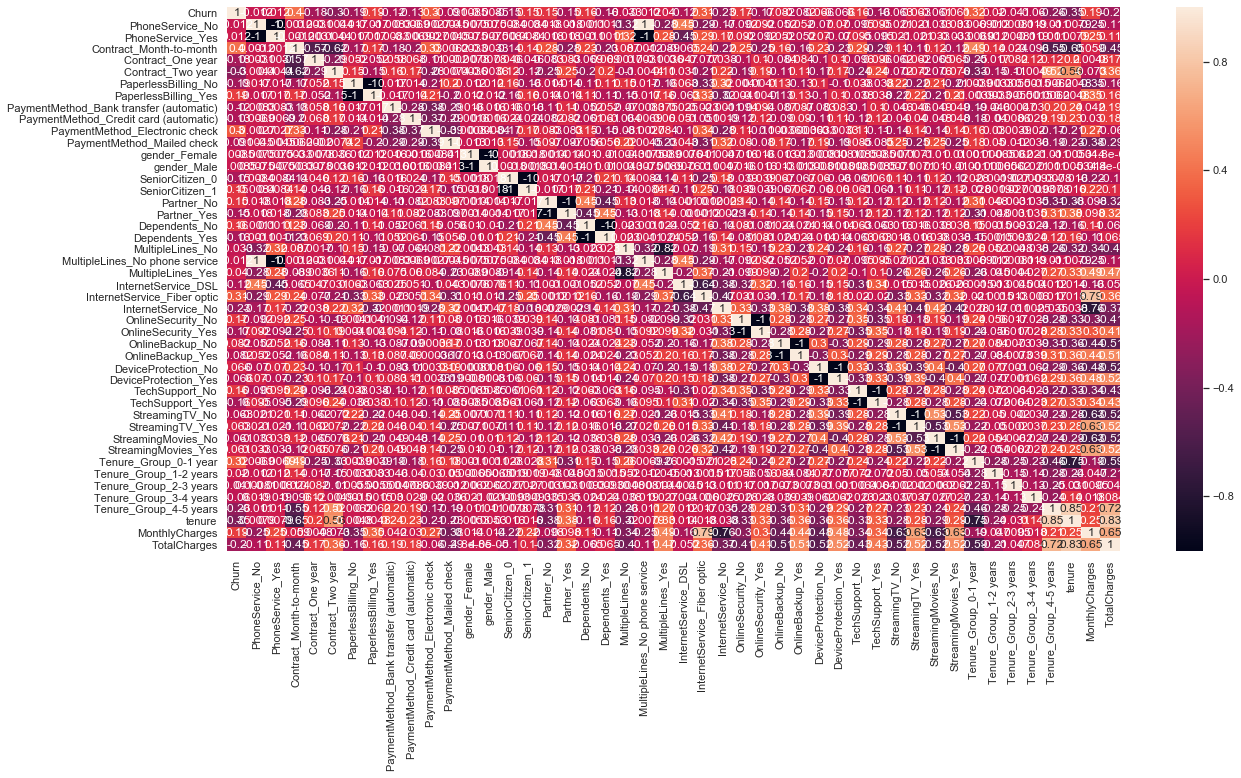

In [56]:
plt.figure(figsize = (20,10))       
sns.heatmap(telecom1.corr(),annot = True)